### Understand Data Structure

In [4]:
# for .csv inside ../data/, print each first line
import os
import csv

for filename in os.listdir('../data/'):
    if filename.endswith('.csv'):
        with open('../data/' + filename) as f:
            reader = csv.reader(f)
            print(next(reader))

['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck']
['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours', 'user_id', 'review_id']
['user_id', 'products', 'reviews']


In [5]:
# for .json inside ../data/, print sturcture
import json, os

for filename in os.listdir('../data/'):
    if filename.endswith('.json'):
        with open('../data/' + filename, encoding='utf-8') as f:
            for line in f:
                try:
                    data = json.loads(line.strip())
                    if isinstance(data, dict):
                        print(f"File: {filename}")
                        print("Header (keys):", list(data.keys()))
                        break
                except json.JSONDecodeError:
                    print(f"Error decoding JSON in line: {line}")


File: games_metadata.json
Header (keys): ['app_id', 'description', 'tags']


### Merge Data

In [3]:
import pandas as pd
import json

In [4]:
# load data
games_df = pd.read_csv('../data/games.csv')
users_df = pd.read_csv('../data/users.csv')
recommendations_df = pd.read_csv('../data/recommendations.csv')

games_metadata = []
with open('../data/games_metadata.json', 'r') as f:
    for line in f:
        games_metadata.append(json.loads(line))
games_metadata_df = pd.json_normalize(games_metadata)

In [5]:
# merge game info
merged_games_df = pd.merge(games_df, games_metadata_df, on='app_id', how='inner')
print(merged_games_df.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck               

In [7]:
# merge review with user info
merged_review_df = pd.merge(recommendations_df, users_df, on='user_id', how='inner')
# drop review_id column
merged_review_df.drop(columns=['review_id'], inplace=True)
# rename columns
merged_review_df.rename(columns={'reviews': 'user'}, inplace=True)
print(merged_review_df.head())

    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    51580   
1   304390        4      0  2017-02-17           False   11.5     2586   
2  1085660        2      0  2019-11-17            True  336.5   253880   
3   703080        0      0  2022-09-23            True   27.4   259432   
4   526870        0      0  2021-01-10            True    7.9    23869   

   products  reviews  
0        28        5  
1       269        1  
2       237        2  
3         5        2  
4        13        2  


### Check distribution

In [1]:
import pandas as pd

In [2]:
# read data
games_df = pd.read_csv('../data/data_temp.csv')
print(games_df.shape)
# drop duplicates
games_df.drop_duplicates(inplace=True)
print(games_df.shape)
# drop rows with missing values
# make a statistic of missing values
print(games_df.isnull().sum())
games_df.dropna(inplace=True)
print(games_df.shape)

C:\Users\Jinuo\AppData\Local\Temp\ipykernel_1836\3934603791.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  games_df = pd.read_csv('../data/data_temp.csv')


(41154794, 30)
(41154794, 30)
app_id                       0
helpful                      0
funny                        0
date                         0
is_recommended               0
hours                        0
user_id                      0
review_id                    0
title                        0
date_release                 0
win                          0
mac                          0
linux                        0
rating                       0
positive_ratio               0
user_reviews                 0
price_final                  0
price_original               0
discount                     0
steam_deck                   0
description           20807203
tags                         0
products                     0
reviews                      0
user_id_enc                  0
app_id_enc                   0
tags_enc                     0
days_since_review            0
review_month                 0
review_day_of_week           0
dtype: int64
(20347591, 30)


In [3]:
print(games_df['user_id'].value_counts().describe())
print(games_df['app_id'].value_counts().describe())

count    7.494898e+06
mean     2.714859e+00
std      9.042705e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.942000e+03
Name: count, dtype: float64
count     36993.000000
mean        550.038953
std        2988.591719
min           1.000000
25%          13.000000
50%          38.000000
75%         163.000000
max      155229.000000
Name: count, dtype: float64


Products Stats:
count    1.430606e+07
mean     1.163734e+02
std      2.438515e+02
min      0.000000e+00
25%      2.300000e+01
50%      5.500000e+01
75%      1.270000e+02
max      3.221400e+04
Name: products, dtype: float64

Reviews Stats:
count    1.430606e+07
mean     2.876738e+00
std      7.987421e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      6.045000e+03
Name: reviews, dtype: float64


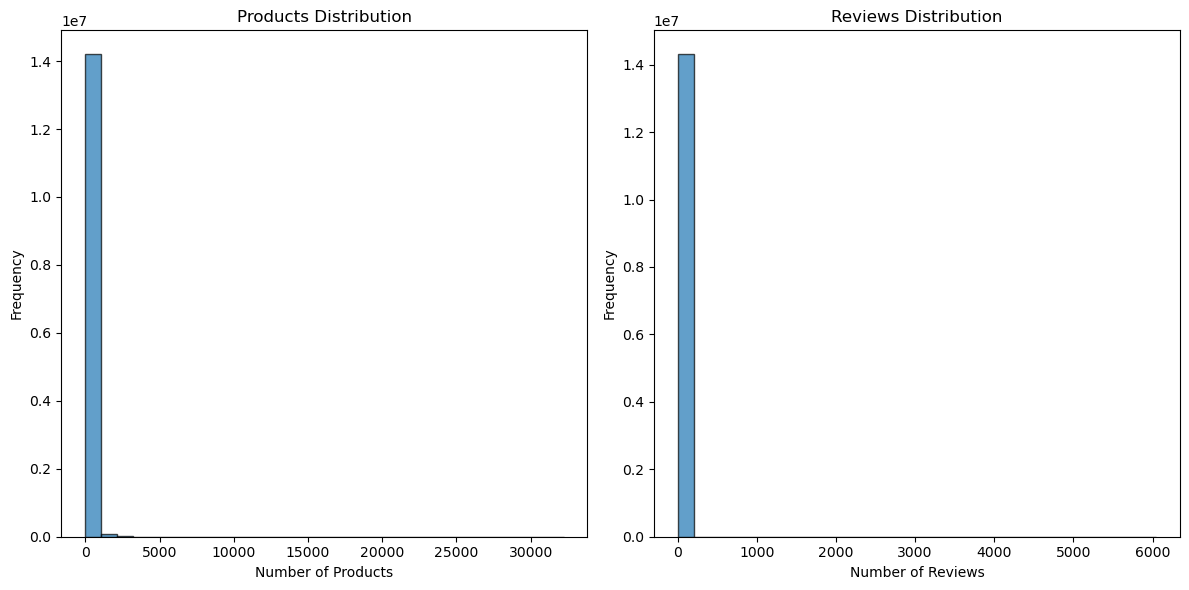

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
users_df = pd.read_csv('../data/users.csv')

# 生成统计信息
products_stats = users_df['products'].describe()
reviews_stats = users_df['reviews'].describe()

print("Products Stats:")
print(products_stats)
print("\nReviews Stats:")
print(reviews_stats)

In [5]:
# 查看recomendations.csv中user_id对应的review数量是否和users.csv中的一致
recommendations_df = pd.read_csv('../data/recommendations.csv')
reviews_per_user = recommendations_df['user_id'].value_counts()
print(reviews_per_user.describe())

count    1.378106e+07
mean     2.986330e+00
std      8.118011e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      6.045000e+03
Name: count, dtype: float64
